# PIMA TRIBE DIABETES :

## What is diabetes? 
The CDC defines diabetes as 'a chronic (long-lasting) health condition that affects how your body turns food into energy.'
Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.

If you have diabetes, your body either doesn’t make enough insulin or can’t use the insulin it makes as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.

There isn’t a cure yet for diabetes, but losing weight, eating healthy food, and being active can really help. Taking medicine as needed, getting diabetes self-management education and support, and keeping health care appointments can also reduce the impact of diabetes on your life.

## Types of diabetes :  
### Type 1 Diabetes
Type 1 diabetes is thought to be caused by an autoimmune reaction (the body attacks itself by mistake) that stops your body from making insulin.

### Type 2 Diabetes
With type 2 diabetes, your body doesn’t use insulin well and can’t keep blood sugar at normal levels. About 90-95% of people with diabetes have type 2.

### Gestational Diabetes
Gestational diabetes develops in pregnant women who have never had diabetes. If you have gestational diabetes, your baby could be at higher risk for health problems. Gestational diabetes usually goes away after your baby is born but increases your risk for type 2 diabetes later in life. Your baby is more likely to have obesity as a child or teen, and more likely to develop type 2 diabetes later in life too.

### Prediabetes :
With prediabetes, blood sugar levels are higher than normal, but not high enough yet to be diagnosed as type 2 diabetes. Prediabetes raises your risk for type 2 diabetes, heart disease, and stroke.

## Why are we interested in Pima tribe?
Pima Indians from the Gila River Indian Community in Arizona have a high incidence rate of type 2 diabetes, and kidney disease attributable to diabetes is a major cause of morbidity and mortality in this population. Since 1965, each member of the population at least 5 years of age is invited to participate in a research examination every other year. During the past 43 years, the overall incidence of diabetes in the Pima Indians has not changed, but the incidence of diabetes among those less than 15 years of age has increased nearly 6-fold, as an increasing prevalence and degree of obesity in the youth has shifted the onset of diabetes to younger ages. The rising frequency of diabetes in the youth has led, in turn, to the emergence in mid-life of the major complications of diabetes, including kidney disease. On the other hand, the introduction and widespread use of medicines to control blood pressure, reduce hyperglycemia, and block the renin-angiotensin system has lead to improvements in the average blood pressure and glycosylated hemoglobin levels in the diabetic population. These countervailing forces have influenced the course of diabetic nephropathy in a generally favorable direction in the past few years, as evidenced by the decline in the overall incidence of end-stage kidney disease since 1990. A continued increase in the incidence of type 2 diabetes in youth, however, threatens to reverse this trend.

 
read more about this in this paper here : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2603306/

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns

#### Loading the file and analyzing how many '0' values are present in the data

In [4]:
file = pd.read_csv(r'diabetes.csv')

In [5]:
file.head() #just checking the head and if we have the data in right format

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Since, instead of having Nan values we have 0s, we cannot make all zeros as Nan. Attributes such as Pregnancies,
# and outcomes can have a 0 value. 
# Zero Values in :

print("zero values in Glucose:")
print( file.loc[file['Glucose'] == 0, 'Glucose'].count() )

print("Zero values in BP :")
print(file.loc[file['BloodPressure'] == 0, 'BloodPressure'].count())

print("Zero values in Skin thickness:")
print(file.loc[file['SkinThickness'] == 0, 'SkinThickness'].count())

print("Zero values in Insulin: ")
print(file.loc[file['Insulin'] == 0, 'Insulin'].count())

print("Zero values in BMI :")
print( file.loc[file['BMI'] == 0, 'BMI'].count() )

print("Zero values in DiabetesPedigreeFucntion:")
print( file.loc[file['DiabetesPedigreeFunction'] == 0, 'DiabetesPedigreeFunction'].count())

print("Zero values in Age : ")
print( file.loc[file['Age'] == 0, 'Age'].count())

zero values in Glucose:
5
Zero values in BP :
35
Zero values in Skin thickness:
227
Zero values in Insulin: 
374
Zero values in BMI :
11
Zero values in DiabetesPedigreeFucntion:
0
Zero values in Age : 
0


#### Assigning Nan values in place of 0s. This avoids conflict  with  cases where 0 is a valid data

In [8]:
file[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = file[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


#### Understanding the data to perform EDA

In [9]:
file.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
file.corr() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


#### Replacing the NaN values with corresponding mean values for better analsys

In [13]:
file.fillna(file.mean(), inplace = True) 

In [14]:
file.corr() #correlation after 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


we see a significant change in the correlation after replacing the nans with mean value. Checking for outliers now. 


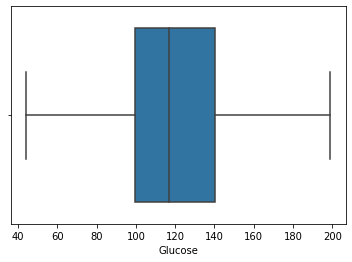

In [18]:
sns.boxplot(x=file['Glucose']) #checking for outliers in Glucose data 


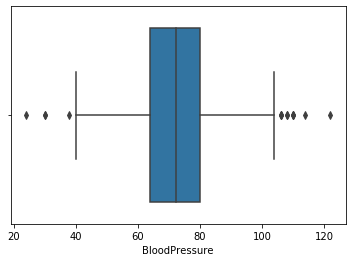

In [19]:
sns.boxplot(x=file['BloodPressure']) #checking for outliers in Blood Pressure data
#we see some outliers here 

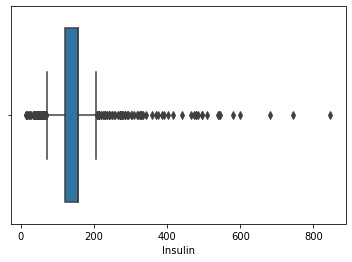

In [20]:
sns.boxplot(x=file['Insulin']) #checking for outliers in Insulin data 
#We see signifacnt number of outliers in this boxplot

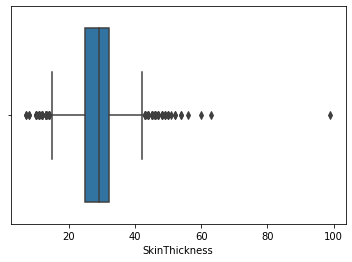

In [21]:
sns.boxplot(x=file['SkinThickness']) #very few outliers for skin thickness 

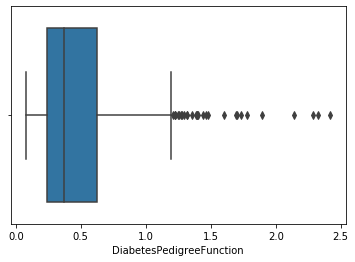

In [22]:
sns.boxplot(x=file['DiabetesPedigreeFunction']) #here also we see some significant number of outliers

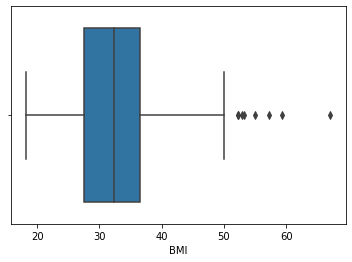

In [23]:
sns.boxplot(x=file['BMI']) 

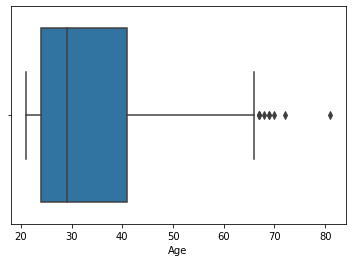

In [24]:
sns.boxplot(x=file['Age']) 

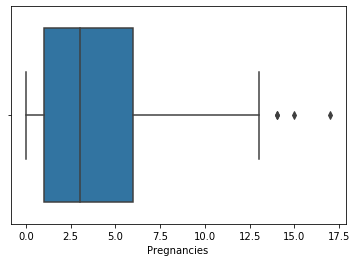

In [25]:
sns.boxplot(x=file['Pregnancies']) 

Performing a pair plot analysis for a quick overview of relation between the independent attributes 

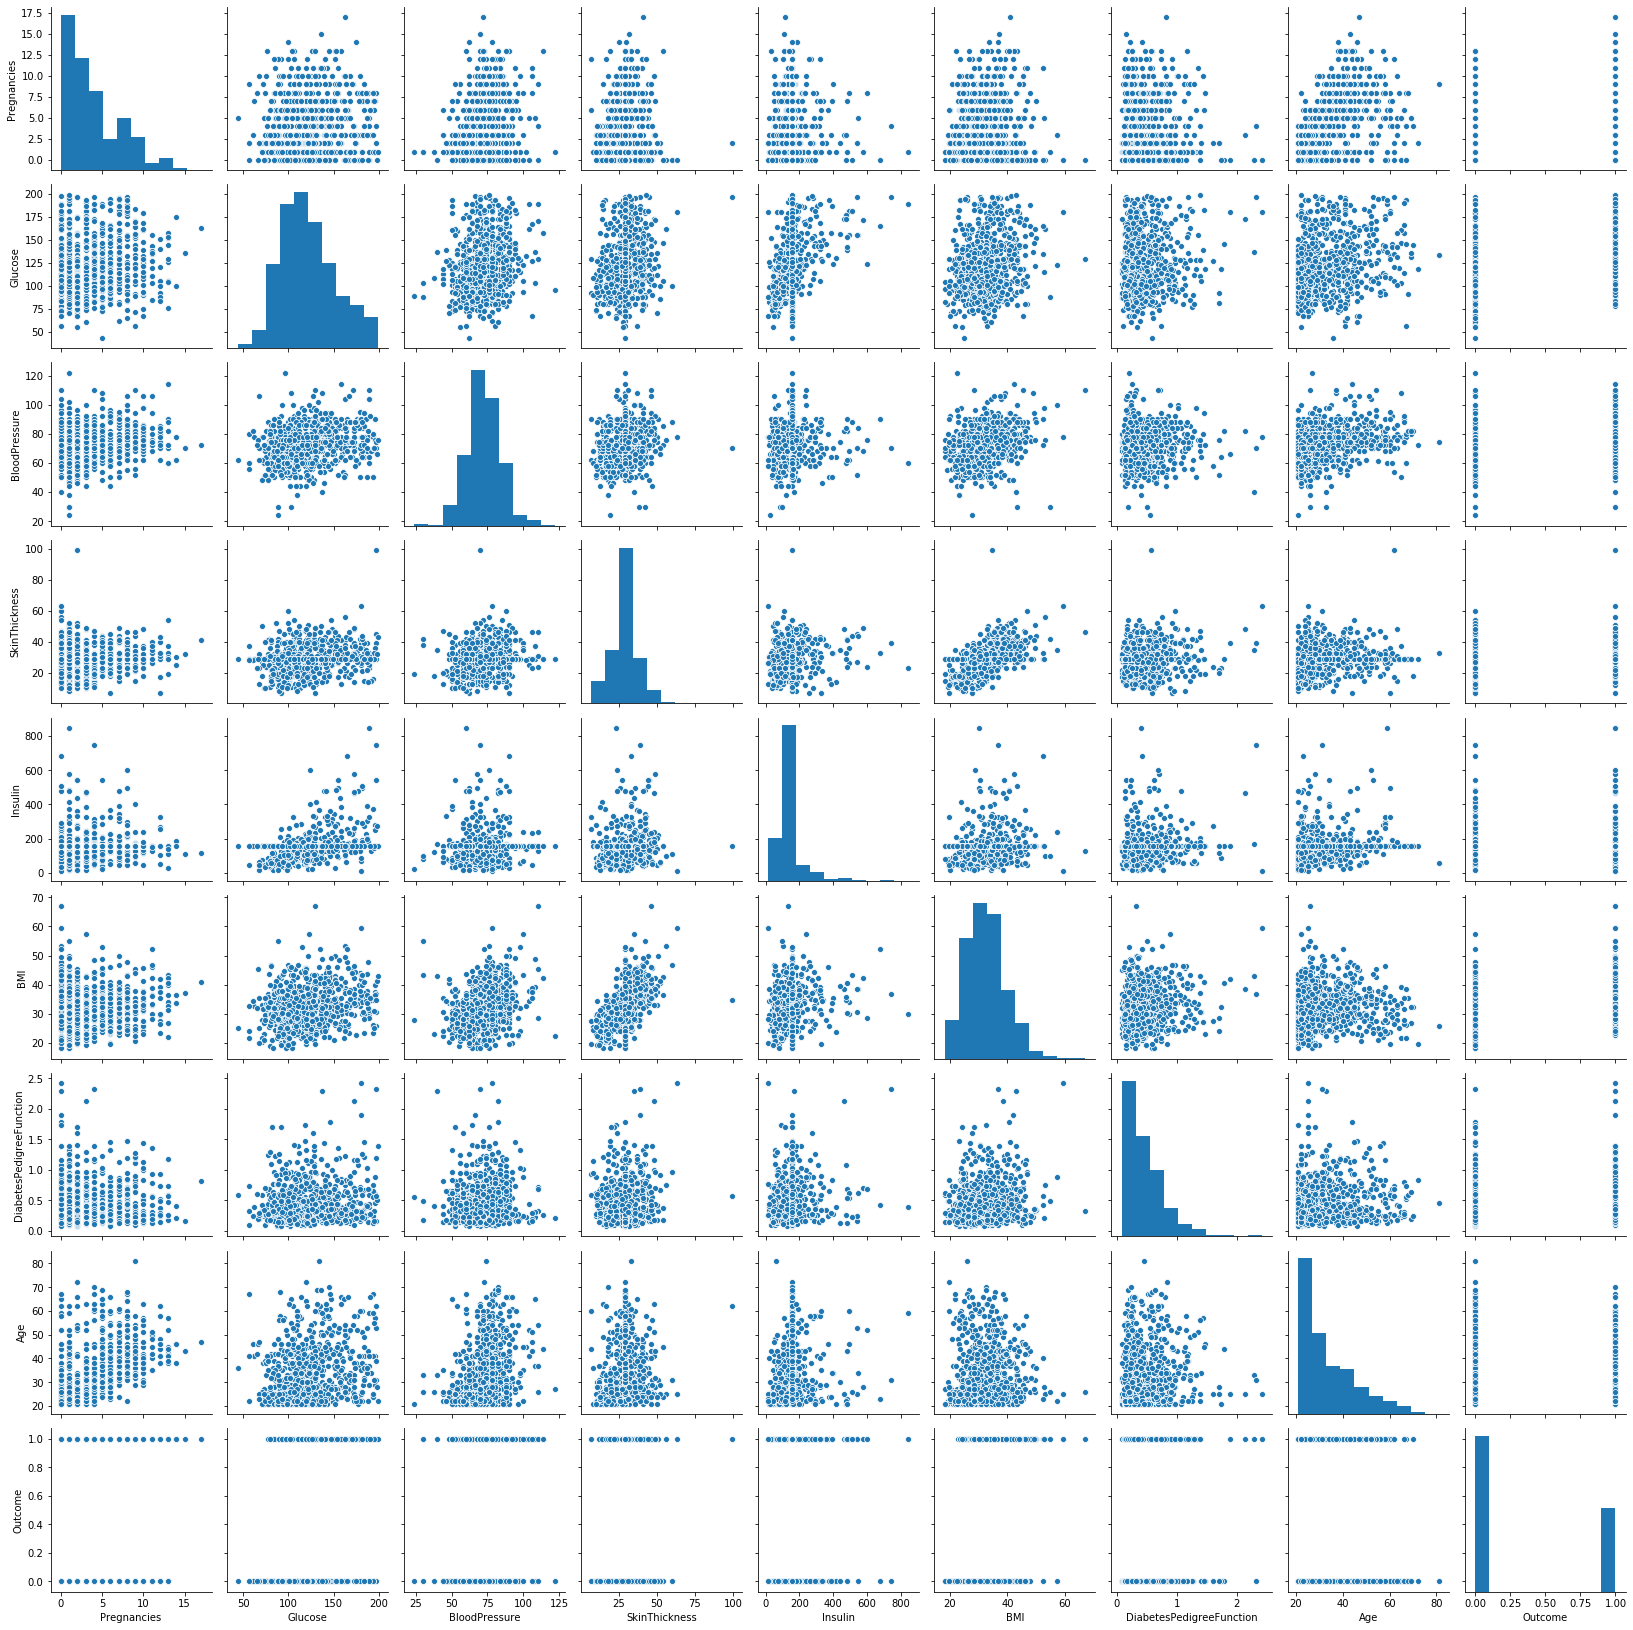

In [26]:
sns.pairplot(file)

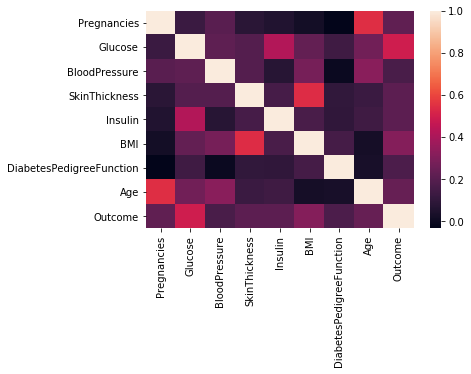

In [27]:
sns.heatmap(file.corr())

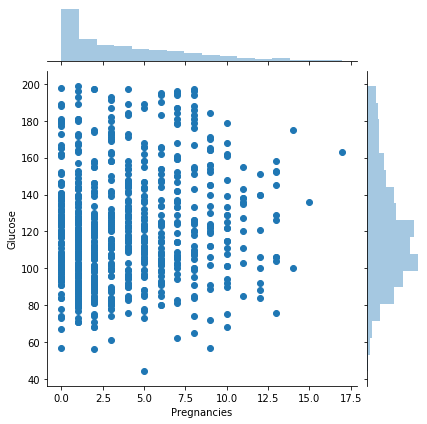

In [71]:
sns.jointplot(x="Pregnancies", y="Glucose", data=file); #between Glucose and Pregnancies 

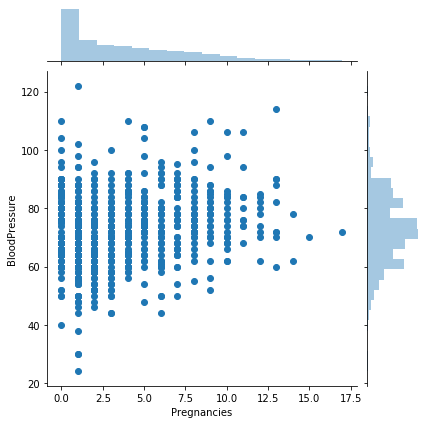

In [72]:
sns.jointplot(x="Pregnancies", y="BloodPressure", data=file);

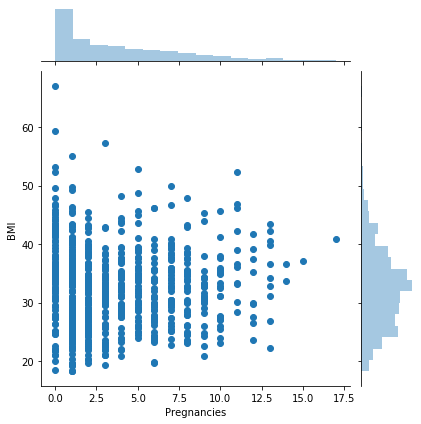

In [73]:
sns.jointplot( x = "Pregnancies", y ="BMI", data = file);

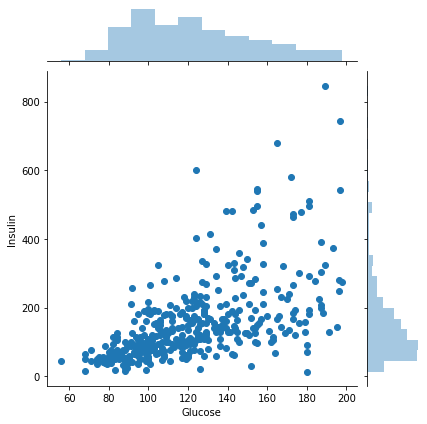

In [74]:
sns.jointplot(x="Glucose", y="Insulin", data=file); #between glucose and insuline

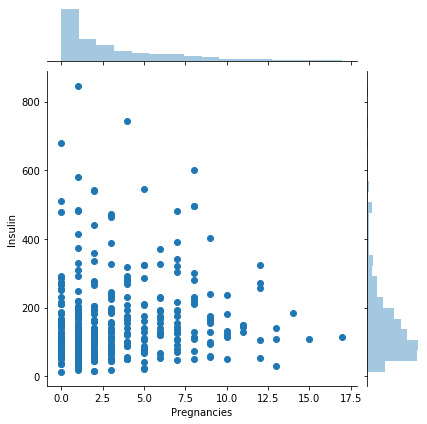

In [75]:
sns.jointplot(x="Pregnancies", y="Insulin", data=file); #between insulin content and pregnancies 

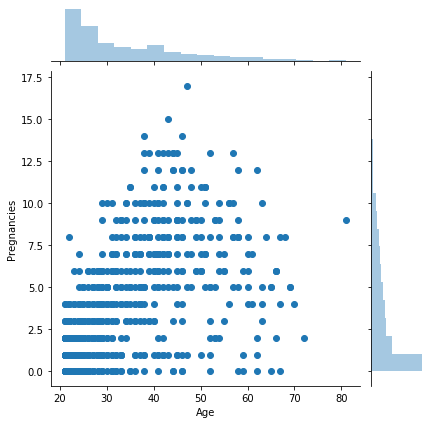

In [76]:
sns.jointplot(x="Age", y="Pregnancies", data=file);

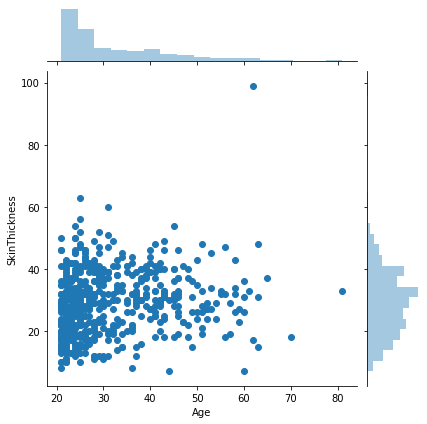

In [77]:
sns.jointplot(x="Age", y="SkinThickness", data=file);

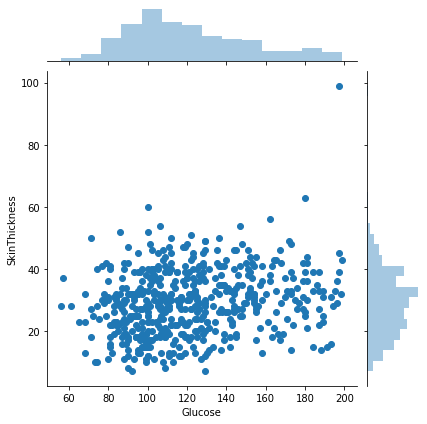

In [78]:
sns.jointplot(x="Glucose", y="SkinThickness", data=file);

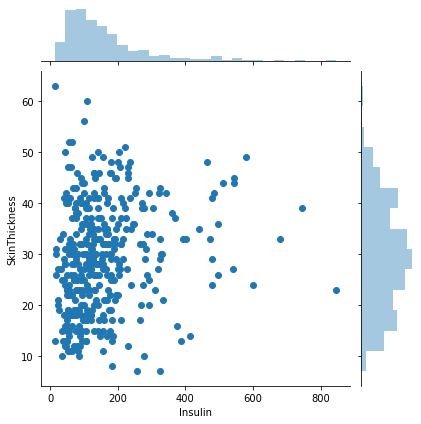

In [79]:
sns.jointplot(x="Insulin", y="SkinThickness", data=file);

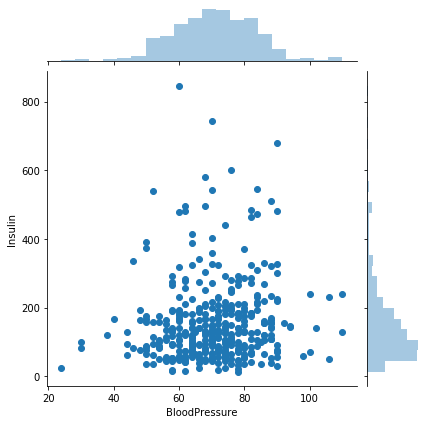

In [80]:
sns.jointplot(x="BloodPressure", y="Insulin", data=file);

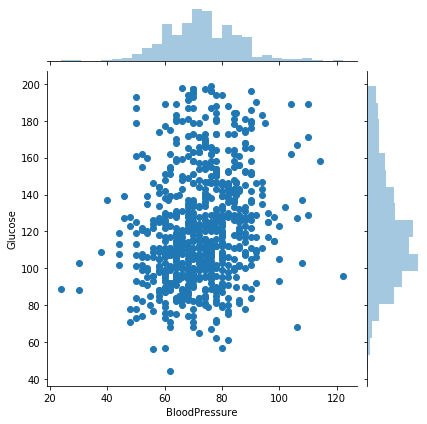

In [81]:
sns.jointplot(x="BloodPressure", y="Glucose", data=file);

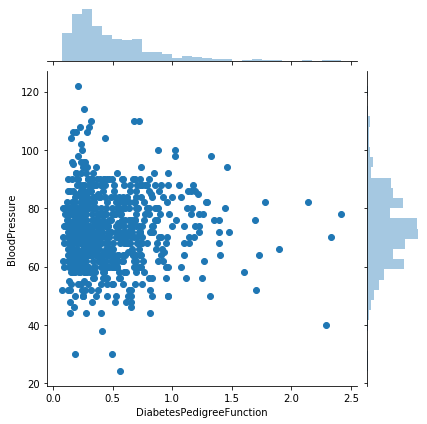

In [82]:
sns.jointplot(x = "DiabetesPedigreeFunction", y = "BloodPressure", data = file );

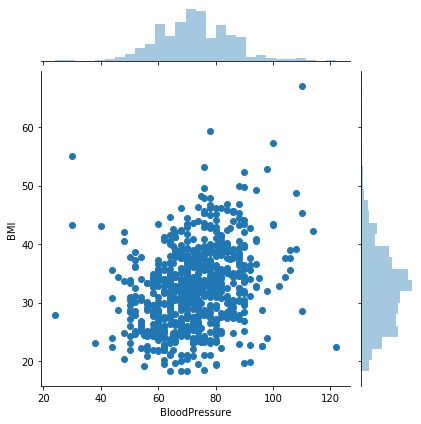

In [83]:
sns.jointplot(x= "BloodPressure", y="BMI", data = file)

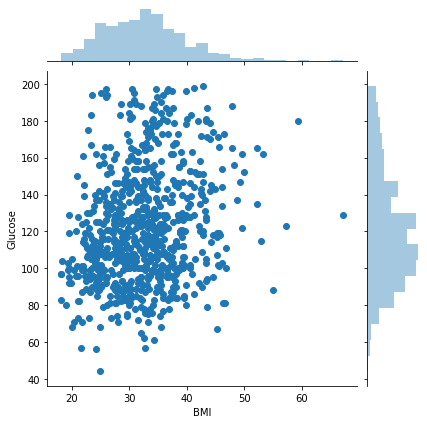

In [84]:
sns.jointplot(x= "BMI", y="Glucose", data = file)

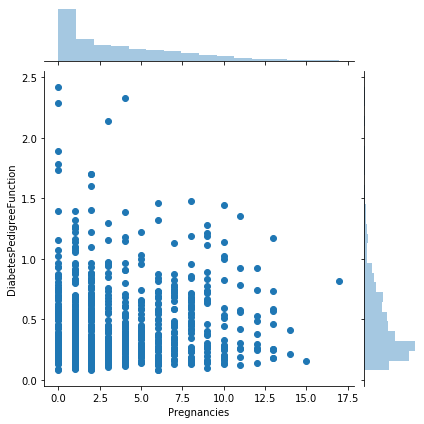

In [85]:
sns.jointplot(x= "Pregnancies", y="DiabetesPedigreeFunction", data = file)

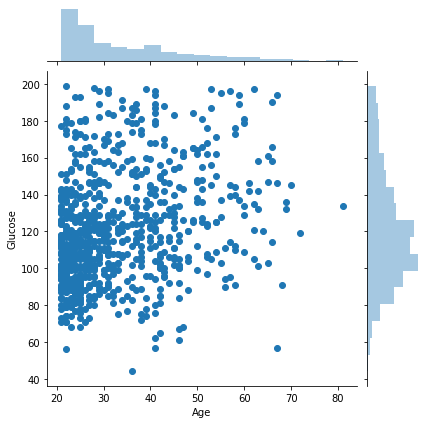

In [86]:
sns.jointplot(x= "Age", y="Glucose", data = file)

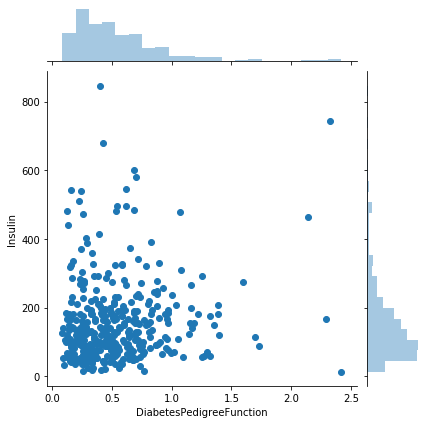

In [87]:
sns.jointplot(x= "DiabetesPedigreeFunction", y="Insulin", data = file)

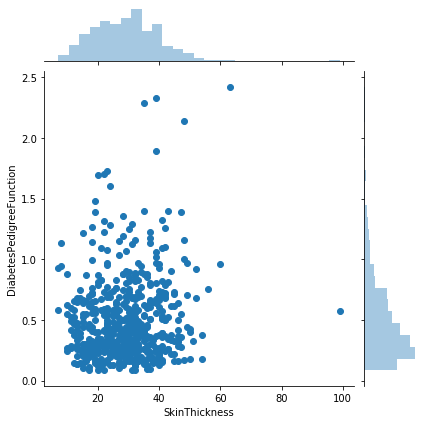

In [88]:
sns.jointplot(x= "SkinThickness", y="DiabetesPedigreeFunction", data = file)

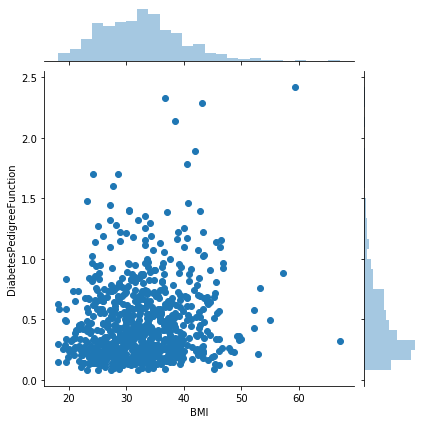

In [89]:
sns.jointplot(x= "BMI", y="DiabetesPedigreeFunction", data = file)

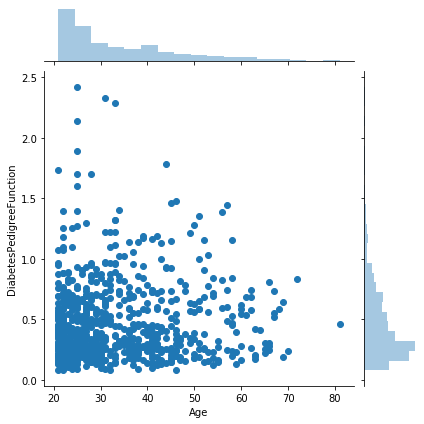

In [90]:
sns.jointplot(x= "Age", y="DiabetesPedigreeFunction", data = file)

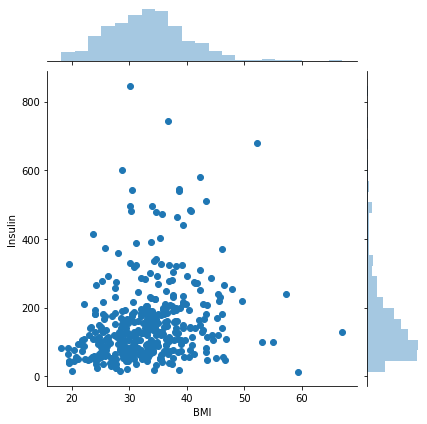

In [91]:
sns.jointplot(x= "BMI", y="Insulin", data = file)

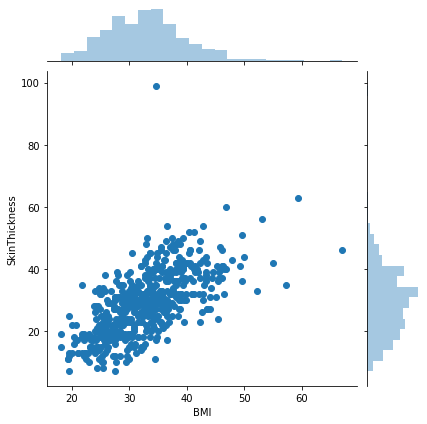

In [92]:
sns.jointplot(x= "BMI", y="SkinThickness", data = file)

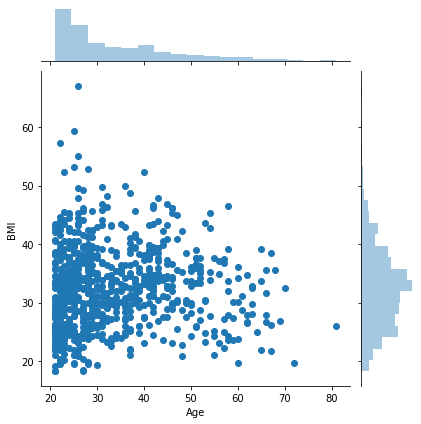

In [93]:
sns.jointplot(x= "Age", y="BMI", data = file)

Box Plot analysis: 

From our analysis of the outliers, we can say that the following attributes have less error values - 

1. Age

2. BloodPressure

3. Glucose

4. Pregnancies

5. skin thickness

Analysis of all attributes :



1. Insulin:
Given the high number of missing values in 'Insulin', it would be in best interest to not take into account for our analysis.

2. Blood Pressure: 

In [219]:
print("Cases of normal BP :")
print( file.loc[file['BloodPressure']< 80 , 'BloodPressure' ].count() )
print("Cases with normal BP who have Diabetes: ")
print( file.loc[(file['BloodPressure']< 80) & (file['Outcome'] == 1) , 'BloodPressure' ].count())

print("Cases with signs of Pre-Hypertension:")
print( file.loc[(file['BloodPressure'] >= 80) & (file['BloodPressure'] <= 89), 'BloodPressure'].count() )
print("Cases with Pre-Hypertension and Diabetes both : ")
print( file.loc[(file['BloodPressure'] >= 80) & (file['BloodPressure'] <= 89) & (file['Outcome'] == 1), 'BloodPressure'].count() )

print("Cases with signs of High BP:")
print( file.loc[file['BloodPressure'] >= 89, 'BloodPressure'].count() )
print("cases of High BP and diabetes both :")
print( file.loc[(file['BloodPressure'] >= 89) & (file['Outcome'] == 1), 'BloodPressure'].count() )

Cases of normal BP :
528
Cases with normal BP who have Diabetes: 
162
Cases with signs of Pre-Hypertension:
145
Cases with Pre-Hypertension and Diabetes both : 
61
Cases with signs of High BP:
60
cases of High BP and diabetes both :
29


3. Glucose :

In [220]:
print("Patients with High (>140 mg/dL) blood sugar :")
print( file.loc[file['Glucose'] > 140,  'Glucose'].count() )
print("Patients with High blood sugar and diabetes: ")
print( file.loc[(file['Glucose'] > 140) & (file['Outcome'] == 1 ),  'Glucose'].count() )

print("Patients with normal( >72 and <140 ) blood sugar :")
print( file.loc[(file['Glucose'] > 72) & (file['Glucose'] < 140), 'Glucose'].count())
print("Patients with normal blood sugar but with diabetes :")
print( file.loc[(file['Glucose'] > 72) & (file['Glucose'] < 140) & (file['Outcome'] == 1 ), 'Glucose'].count())

print("Patients with low blood sugar (<72) :")
print( file.loc[file['Glucose'] < 72, 'Glucose' ].count())
print("Patients with low blood sugar and diabetes: ")
print( file.loc[(file['Glucose'] < 72) & (file['Outcome'] == 1 ) , 'Glucose' ].count())

Patients with High (>140 mg/dL) blood sugar :
192
Patients with High blood sugar and diabetes: 
132
Patients with normal( >72 and <140 ) blood sugar :
550
Patients with normal blood sugar but with diabetes :
131
Patients with low blood sugar (<72) :
15
Patients with low blood sugar and diabetes: 
0


4. BMI 

In [222]:
print("Underweight:")
print( file.loc[file['BMI'] < 18.5,'BMI'].count())
print("Patients that underweight and diabetic: ")
print( file.loc[(file['BMI'] < 18.5) & (file['Outcome'] ==1) ,'BMI'].count())

print("Normal weight:")
print( file.loc[(file['BMI'] > 18.5) & (file['BMI'] <25),'BMI'].count())
print("Patients with normal weight and diabetes:  ")
print( file.loc[(file['BMI'] > 18.5) & (file['BMI'] <25) & (file['Outcome'] == 1 ),'BMI'].count())

print("Overweight:")
print( file.loc[(file['BMI'] > 25) & (file['BMI'] <30),'BMI'].count())
print("Overweight patients that are diabetic : ")
print( file.loc[(file['BMI'] > 25) & (file['BMI'] <30) & (file['Outcome'] == 1 ) ,'BMI'].count())

print("Obese:")
print( file.loc[file['BMI'] > 30, 'BMI'].count())
print("Obese patients that are diabetic :")
print( file.loc[(file['BMI'] > 30) & (file['Outcome'] == 1), 'BMI'].count())

Underweight:
4
Patients that underweight and diabetic: 
0
Normal weight:
102
Patients with normal weight and diabetes:  
7
Overweight:
173
Overweight patients that are diabetic : 
40
Obese:
465
Obese patients that are diabetic :
215


5. Skin Thickness

Since 227 people have reported 0mm skin thickness, this does not seem to be a factor to be accounted for in our analysis. 

6. Diabetes Pedigree Functions:  

From boxplot analysis, we see a large number of outliers which can lead to false predictions. Therefore, it does not seem to be
a factor to be accounted for in our analysis. 

7. Age : 

In [229]:
print("Median age in our dataset : " , file['Age'].median() )
print("Number of 29 year olds : ")
print(file.loc[file['Age'] == 25, 'Age'].count())
print("Number of 29 year olds with diabetes : ")
print( file.loc[(file['Age'] == 25 ) & (file['Outcome'] == 1 ), 'Age'].count())

Median age in our dataset :  29.0
Number of 29 year olds : 
48
Number of 29 year olds with diabetes : 
14


Age seems to not be a major factor that is causing diabetes in our patients. From the scatter plot, It seems to be giving expected results for the age groups. (29% for 29year olds)
    

8. Outcome : 

In [213]:
count_one = file.loc[file['Outcome'] == 1, 'Outcome'].count()
percentage_one = ( count_one / 768 ) * 100
print("Percentage of patients with diabetes : {:.2f} ".format(percentage_one))

Percentage of patients with diabetes : 34.90 


Values that can be good predictors are as follows: 
    1. Blood Pressure
    2. BMI 
    3. Glucose 

< End of notebook >